In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randint
from numpy import loadtxt

In [2]:
L = 8                                         # Lattice size is LxL
kB = 1.0                                      # Boltzman constant
J = 1.0                                       # Coupling constant
Nconf = 10000                                 # Total number of converged conf for dataset
Tm, TM =0.1, 5.                               # Temperature limits
res = (TM - Tm)/Nconf                         # Resolution
file = open('invBeta.txt', 'w')
for i in np.arange(Nconf):
    file.write('{:.5f}\n'.format(Tm+(i*res))) # Evenly spaced sequence with resolution
file.close()


Temp = np.loadtxt('invBeta.txt')              # temperature
print('temperature shape: {}. from {} K to {} K. at resolution {}'.format(Temp.shape, Temp[0], Temp[-1], res))

temperature shape: (10000,). from 0.1 K to 4.99951 K. at resolution 0.00049


In [3]:
def energy( s ) : 
    """
        This is a tricky function to make without loops.
    """
    return -J * ( np.sum( s[0:L-1,:] * s[1:L,:] ) + np.sum( s[:,0:L-1] * s[:,1:L] ) )

#def magnetization( s ) : 
#    return np.sum( s ) / (L*L)

def createLattice( L ) : 
    """
        Creates an LxL lattice of random spins, $s_{ij} = \pm 1$.
    """
    return ( rand( L, L ) < 0.5 ) * 2 - 1  # more Boolean jujutsu

def ising( s, n, T ) : 
    """
        Runs the Metropolis algorithm $n$ times on the lattice $s_{ij}$.
    """
    #M = np.zeros( n )         # used to store the magnetizations, $M(t)$
    E = np.zeros( n )         # used to store the energy, $E(t)$
    E[0] = energy( s )
    #M[0] = magnetization( s )
    for t in range( 1, n ) :     # $t$ is our pseudo-time
        s, E[t] = metropolis( s, E[t-1] , T)
        #M[t] = magnetization( s )
    return s, E
        
def metropolis( s, oldE, T) : 
    # flip a random spin and calculate $dE$
    i, j = randint( L, size=2 )
    s[i,j] *= -1    # flip the ij spin
    E = energy( s )
    deltaE = E - oldE

    # these are the Metropolis tests 
    if deltaE < 0 : 
        # keep the flipped spin because it lowers the energy
        return s, E
    if rand() < np.exp( - deltaE / T ) : 
        # keep the spin flip because the random number is less than $e^{-dE/T}$
        return s, E

    # the spin flip is rejected 
    s[i,j] *= -1    # flip the ij spin back
    E = oldE        # and keep the old energy
    return s, E

In [4]:

n = 10000         # the number of Monte Carlo time steps

file = open('conf.txt', 'w')
for sampleT in Temp:
    s = createLattice( L )
    s, E = ising( s, n, sampleT )
    for row in s:
        np.savetxt(file, row)
file.close()


In [5]:
from numpy import loadtxt
data = np.loadtxt('conf.txt').reshape(-1,8,8)
print(data.shape)

(10000, 8, 8)


In [6]:
print('{}\n{}\n{}\n'.format(data[0],data[5000],data[9999]))

[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]
[[ 1.  1.  1.  1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1. -1.  1. -1.]
 [ 1. -1. -1.  1.  1.  1.  1. -1.]
 [ 1.  1. -1.  1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1. -1. -1.]]
[[ 1.  1. -1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1.  1.  1. -1.  1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [ 1.  1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.]
 [ 1. -1. -1.  1.  1. -1.  1.  1.]]



MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.
MovieWriter Pillow unavailable; using Pillow instead.


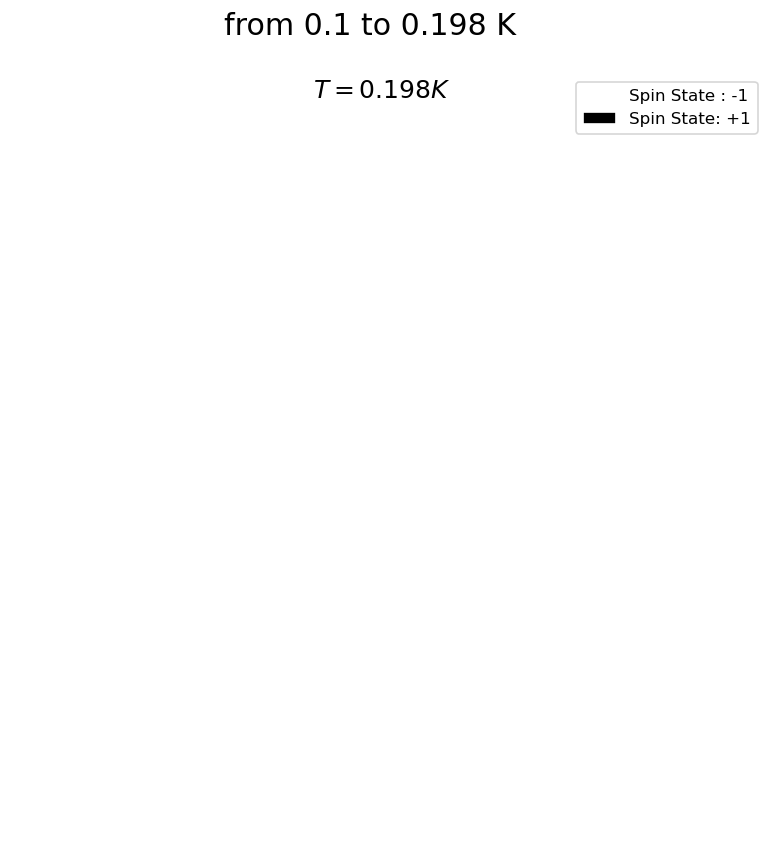

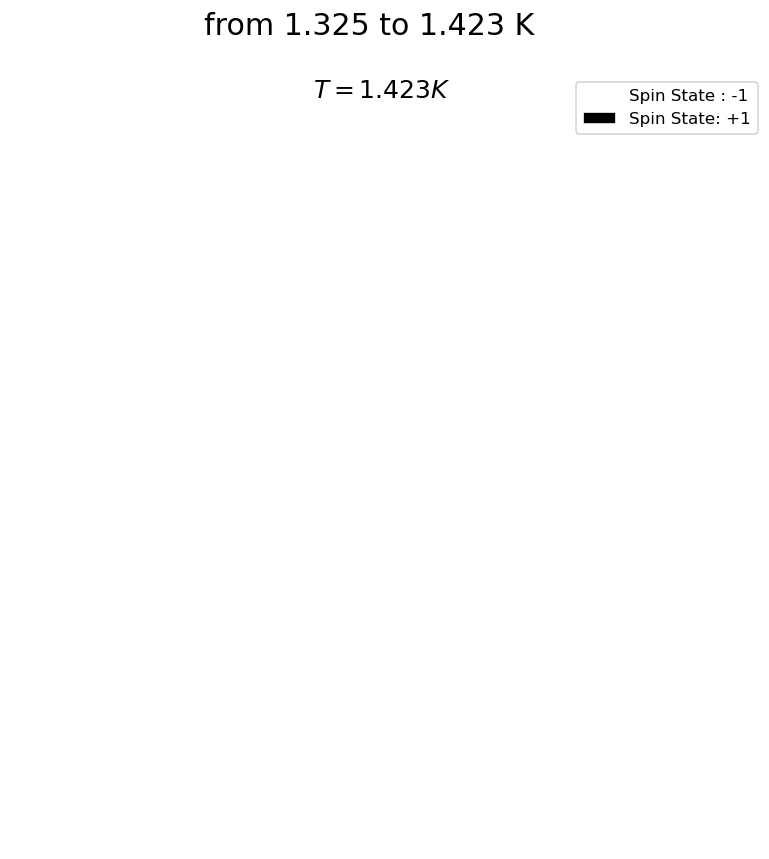

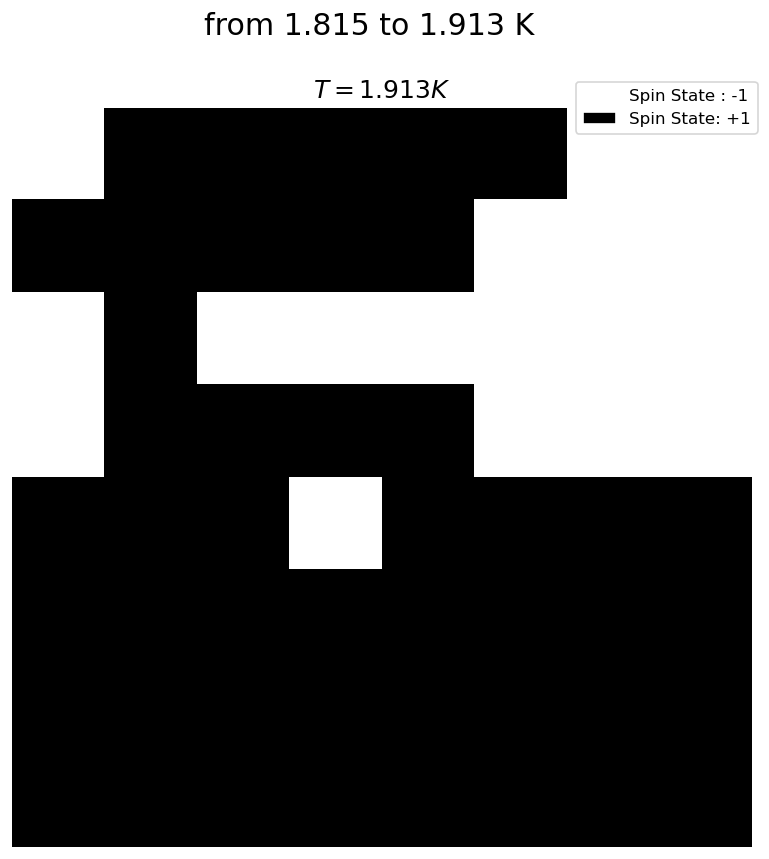

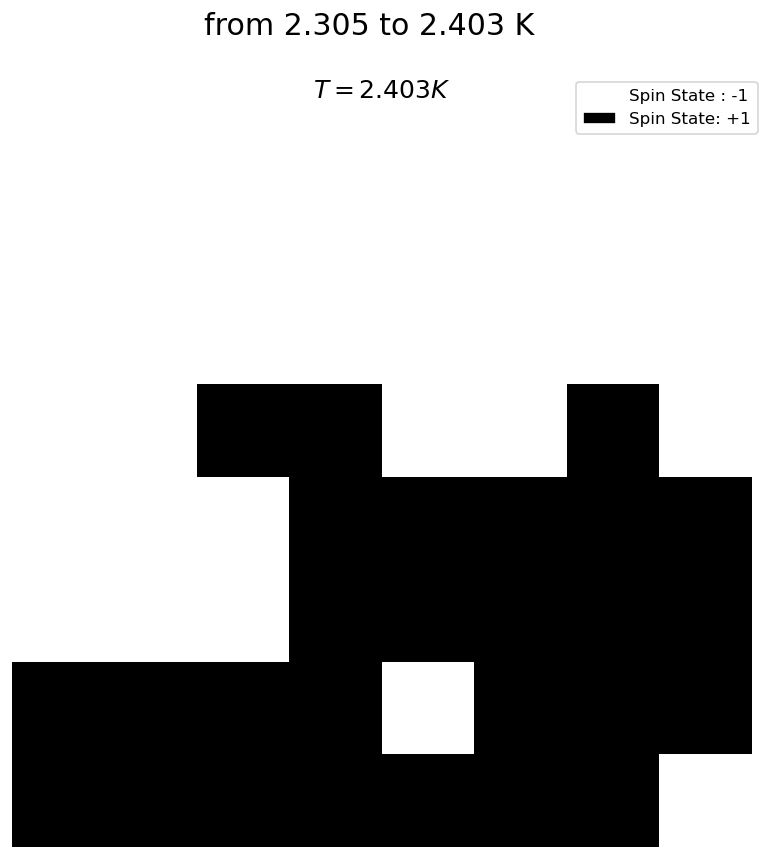

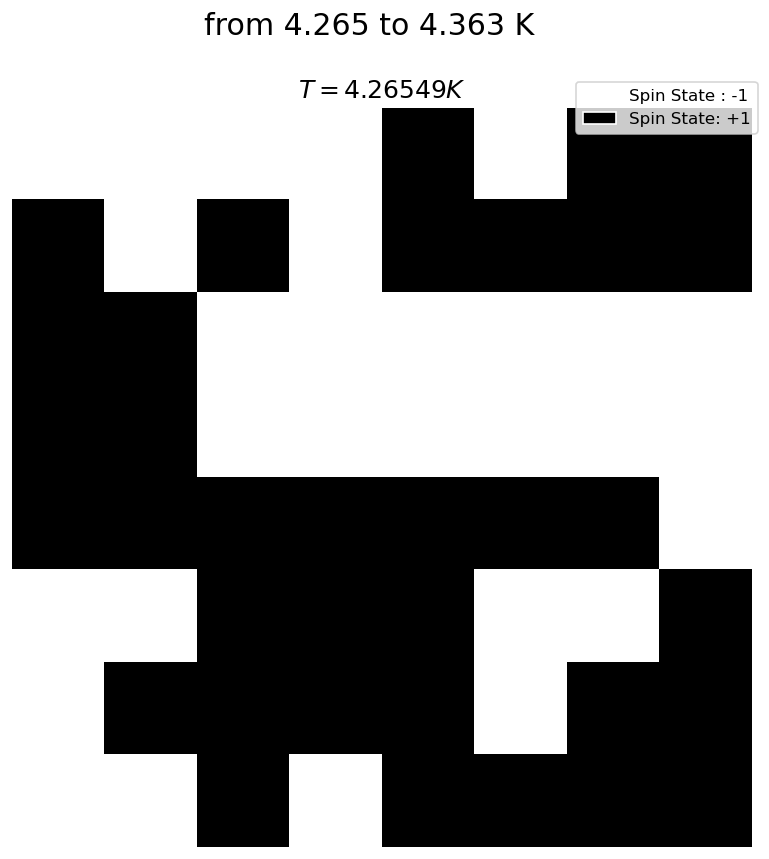

In [71]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.animation import FuncAnimation

NoF = 200  
for firstF in [0, 2500, 3500, 4500, 8500]:
    lastF = NoF + firstF
    colors = ['white', 'black']
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), dpi = 120)
    legend_elements = [Patch(facecolor=color, edgecolor='w') for color in colors]
    line = ax.imshow(data[firstF], cmap=LinearSegmentedColormap.from_list('', colors))
    def update(i):
        i += (firstF + 1)
        line.set_data(data[i])
        ax.set_title('$T={} K$'.format(Temp[i]), fontsize = 15)
        ax.set_axis_off()
    plt.suptitle('from {} to {} K'.format(Temp[firstF], Temp[lastF]), fontsize = 18)
    anim = FuncAnimation(fig, update, frames=NoF, interval=70)
    ax.legend(handles=legend_elements,
              labels=[f"Spin State : -1", f"Spin State: +1"],
              loc="right", bbox_to_anchor=[1.02, 1])
    anim.save('ising{:.2}.gif'.format(Temp[firstF]), writer='Pillow')